In [31]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!apt-get install python3.10

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.5-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [34]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
print('Done')

Done


In [39]:
os.listdir('/content/drive/MyDrive/Colab Notebooks')

['test_interview.csv',
 'train_interview.csv',
 'DepressionAnxietyFacebookpageCommentsText.xlsx',
 'Untitled folder',
 "Hime's Project.ipynb",
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 'train_interview.gsheet']

In [46]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/train_interview.xlsx')
dataset.head()

,Comments Text
0,Which people might believe Hong Kong is pretty...
1,And it's very crowded even as compared to Hong...
2,And the main thing about Delhi is that it's pr...
3,But it was way different than the places I've ...
4,So I guess the pressure comes from that just w...


In [47]:
dataset.shape

(1952, 1)

In [48]:
dataset.isnull().sum()

Comments Text    0
dtype: int64

In [49]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

for i in range(len(dataset)):
  dataset.at[i,'Comments Text'] = remove_urls(dataset.iloc[i]['Comments Text'])
dataset.head()

,Comments Text
0,Which people might believe Hong Kong is pretty...
1,And it's very crowded even as compared to Hong...
2,And the main thing about Delhi is that it's pr...
3,But it was way different than the places I've ...
4,So I guess the pressure comes from that just w...


In [52]:
# Convert to list
data = dataset['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['Which people might believe Hong Kong is pretty crowded but Delhi is more crowded']


In [53]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['which', 'people', 'might', 'believe', 'hong', 'kong', 'is', 'pretty', 'crowded', 'but', 'delhi', 'is', 'more', 'crowded']]


In [54]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['which', 'people', 'might', 'believe', 'hong_kong', 'is', 'pretty', 'crowded', 'but', 'delhi', 'is', 'more', 'crowded']


In [55]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

stop_words = set(stopwords.words("english"))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [56]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [58]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [59]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['people', 'believe', 'pretty', 'crowded', 'delhi', 'crowded']]


In [60]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)

In [61]:
no_features = 15000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names()

In [62]:
no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [63]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tf_feature_names, no_top_words)

NMF
Topic 0:
food, indian food, indian, good, favorite, spicy, favorite food, kind food, italian, offer, thai food, thai, make, hate, know make, italian food, recommend, know, good food, food spicy, kind, food good, food know, pretty good, food know make
Topic 1:
go, go go, work go, go lot, work, last, lot, place, recent work go, recent, recent work, year, competition, recommend, get, hike, go okay, work go okay, recently go, go last, really, recently, go well, holiday, okay
LDA
Topic 0:
really, good, know, people, friend, actually, think, life, get, lot, well, go, also
Topic 1:
lot, go, well, think, get, life, also, people, good, know, actually, friend, really


In [64]:
# Create Document — Topic Matrix
lda_output = lda.transform(tf)
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/train_interview.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset2['label'] = df_document_topics['dominant_topic']

In [65]:
dataset2.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [66]:
# Create Document — Topic Matrix
nmf_output = nmf.transform(tfidf)
# column names
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/train_interview.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [67]:
dataset1.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [68]:
dataset1[dataset1['label']==1]

,Comments Text,label
11,Whereas I feel like you know other students wh...,1
13,Other worries is just I'm worried about going ...,1
23,There are like hundreds of other like starving...,1
24,Other than that yeah I mean I guess my attitud...,1
35,I think had I been given the choice I would ha...,1
...,...,...
1903,How is my recent work going well to be honest ...,1
1912,Uh if if you're asking me is there anywhere w...,1
1914,uh I think it was around two years ago I went ...,1
1928,Uh it has got a lot of na traditional dances a...,1


In [69]:
for i in range(20):
    print(dataset1[dataset1['label']==1].iloc[i][0])
    print('\n')

Whereas I feel like you know other students who are going to like PhDs they still get to learn stuff and get to be like top of their top of their field when they come out


Other worries is just I'm worried about going into like a dead end career


There are like hundreds of other like starving Somali children going through way worse


Other than that yeah I mean I guess my attitude when going to an exam is like you know if you fail it what's the worst that can happen


I think had I been given the choice I would have probaby went to the States and did something like psychology


And I don't know whether this semester it's gonna go below I'm gonna fall below the border or I'm gonna stay or move up


And it was it was mostly it was a family trip so we didn't really go out much


Apart from that today is extremely stressful for me because like I have to go for an orientation then I have to go for a class which is like a class slash dinner


But my plan is to go back to the States and wor

In [70]:
dataset2[dataset2['label']==1]

,Comments Text,label
6,But still I like competitions I mean I think y...,1
11,Whereas I feel like you know other students wh...,1
13,Other worries is just I'm worried about going ...,1
17,But still like I have got to pay for my own re...,1
21,Well love life I gave up on that long time ago,1
...,...,...
1936,Um both the international students as well as ...,1
1940,I'm in my second year now so I've pretty much ...,1
1942,Yeah I like Indian food a lot um because it's ...,1
1944,And uh I would not prefer Hong Kong as my home...,1


In [71]:
for i in range(20):
    print(dataset2[dataset2['label']==1].iloc[i][0])
    print('\n')

But still I like competitions I mean I think you still want to win


Whereas I feel like you know other students who are going to like PhDs they still get to learn stuff and get to be like top of their top of their field when they come out


Other worries is just I'm worried about going into like a dead end career


But still like I have got to pay for my own rent got to pay for my own food


Well love life I gave up on that long time ago


There are like hundreds of other like starving Somali children going through way worse


So I started doing a bunch of other stuff so a few hackathons design competitions and also I did this like first year engineering course


I think had I been given the choice I would have probaby went to the States and did something like psychology


I got two and half weeks and I still haven't started looking at so kind of screwed


And I think I did pretty poorly in the midterm as well


I think the course I found most difficult would probably be interactive s

In [72]:
dataset1.head(15)

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0
5,And it still hurts when you lose,0
6,But still I like competitions I mean I think y...,0
7,But then as soon as you realize that you can't...,0
8,And it it turned like you know at first it was...,0
9,I guess most of the pressure came from myself ...,0


In [73]:
for i in range(len(dataset2)):
  dataset1.at[i,'Comments Text'] = remove_urls(dataset1.iloc[i]['Comments Text'])
dataset1.head()

,Comments Text,label
0,Which people might believe Hong Kong is pretty...,0
1,And it's very crowded even as compared to Hong...,0
2,And the main thing about Delhi is that it's pr...,0
3,But it was way different than the places I've ...,0
4,So I guess the pressure comes from that just w...,0


In [74]:
# Convert to list
data = dataset1['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove distracting commas
data = [re.sub(",", "", sent) for sent in data]

# Remove distracting commas
data = [sent.lower() for sent in data]

# Remove distracting dots
data = [sent.replace('.', '') for sent in data]

print(data[:1])

['which people might believe hong kong is pretty crowded but delhi is more crowded']


In [75]:
tweets = np.array(data)
labels = np.array(dataset2['label'])

In [76]:
print(len(tweets),len(labels))

1952 1952


In [77]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
max_words = 20000
max_len = 400

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    7   61  561]
 [   0    0    0 ...    3   36   39]
 [   0    0    0 ...   14   86  663]
 ...
 [   0    0    0 ...  104    8  182]
 [   0    0    0 ...  635  185  161]
 [   0    0    0 ...  170    4 2664]]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

1464 488 1464 488


In [79]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40))
model1.add(layers.LSTM(40,dropout=0.5))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=7,validation_data=(X_test, y_test))

Epoch 1/7
46/46 [==============================] - 17s 276ms/step - loss: 0.5830 - accuracy: 0.7111 - val_loss: 0.5681 - val_accuracy: 0.7111
Epoch 2/7
46/46 [==============================] - 11s 240ms/step - loss: 0.5323 - accuracy: 0.7227 - val_loss: 0.5181 - val_accuracy: 0.7377
Epoch 3/7
46/46 [==============================] - 10s 219ms/step - loss: 0.4384 - accuracy: 0.7992 - val_loss: 0.4176 - val_accuracy: 0.8402
Epoch 4/7
46/46 [==============================] - 10s 224ms/step - loss: 0.3004 - accuracy: 0.8880 - val_loss: 0.3388 - val_accuracy: 0.8607
Epoch 5/7
46/46 [==============================] - 10s 226ms/step - loss: 0.2152 - accuracy: 0.9208 - val_loss: 0.3300 - val_accuracy: 0.8668
Epoch 6/7
46/46 [==============================] - 10s 218ms/step - loss: 0.1613 - accuracy: 0.9392 - val_loss: 0.2882 - val_accuracy: 0.8975
Epoch 7/7
46/46 [==============================] - 10s 219ms/step - loss: 0.1252 - accuracy: 0.9577 - val_loss: 0.2818 - val_accuracy: 0.8852


In [80]:
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

16/16 - 1s - loss: 0.2818 - accuracy: 0.8852 - 1s/epoch - 65ms/step
Model accuracy:  0.8852459192276001


In [81]:
y_pred = model1.predict(X_test)

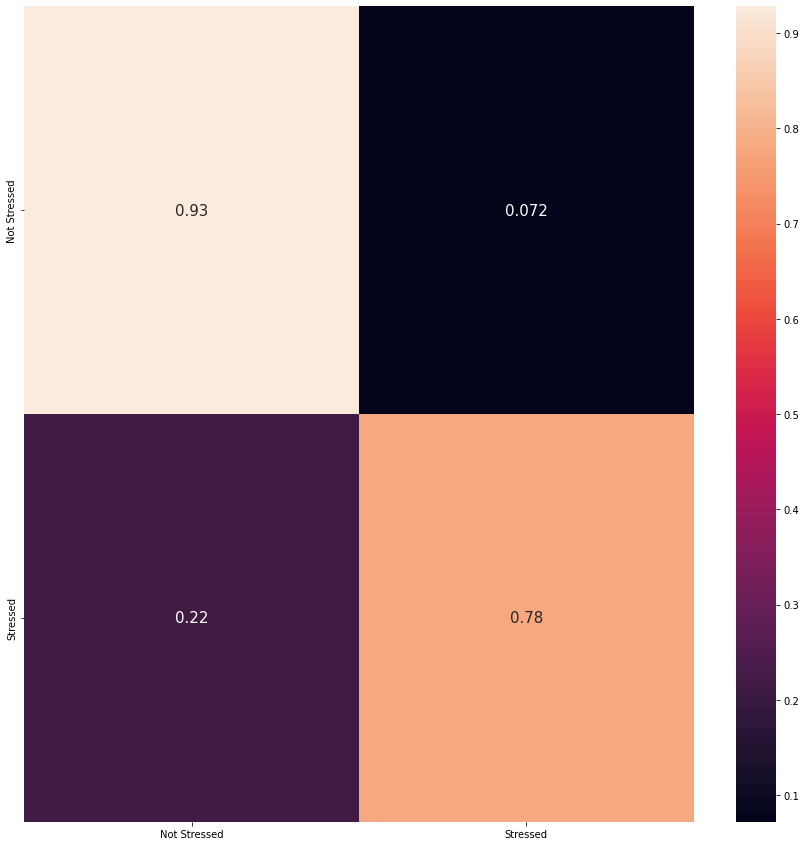

In [82]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [83]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40))
model2.add(layers.LSTM(40,dropout=0.5,return_sequences=True))
model2.add(layers.LSTM(40,dropout=0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
46/46 [==============================] - 26s 464ms/step - loss: 0.5912 - accuracy: 0.7042 - val_loss: 0.5638 - val_accuracy: 0.7131
Epoch 2/5
46/46 [==============================] - 21s 456ms/step - loss: 0.5194 - accuracy: 0.7548 - val_loss: 0.4868 - val_accuracy: 0.7766
Epoch 3/5
46/46 [==============================] - 21s 468ms/step - loss: 0.3539 - accuracy: 0.8586 - val_loss: 0.3599 - val_accuracy: 0.8402
Epoch 4/5
46/46 [==============================] - 21s 449ms/step - loss: 0.2362 - accuracy: 0.9105 - val_loss: 0.3279 - val_accuracy: 0.8586
Epoch 5/5
46/46 [==============================] - 20s 442ms/step - loss: 0.1976 - accuracy: 0.9262 - val_loss: 0.3029 - val_accuracy: 0.8811


In [84]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

16/16 - 1s - loss: 0.3029 - accuracy: 0.8811 - 1s/epoch - 68ms/step
Model accuracy:  0.881147563457489


In [85]:
y_pred = model2.predict(X_test)

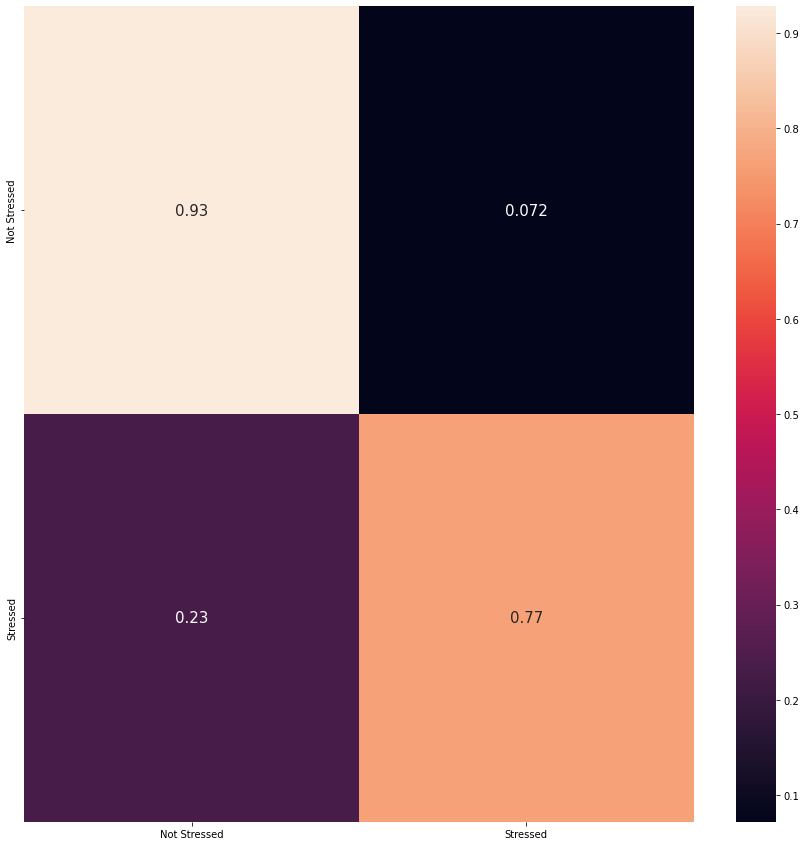

In [86]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [87]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40))
model3.add(layers.Bidirectional(layers.LSTM(40,dropout=0.5)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
46/46 [==============================] - 24s 383ms/step - loss: 0.5973 - accuracy: 0.7097 - val_loss: 0.5871 - val_accuracy: 0.7111
Epoch 2/8
46/46 [==============================] - 17s 364ms/step - loss: 0.5473 - accuracy: 0.7138 - val_loss: 0.5294 - val_accuracy: 0.7254
Epoch 3/8
46/46 [==============================] - 16s 358ms/step - loss: 0.4578 - accuracy: 0.7862 - val_loss: 0.4471 - val_accuracy: 0.7930
Epoch 4/8
46/46 [==============================] - 17s 362ms/step - loss: 0.3350 - accuracy: 0.8695 - val_loss: 0.3684 - val_accuracy: 0.8402
Epoch 5/8
46/46 [==============================] - 17s 362ms/step - loss: 0.2401 - accuracy: 0.9173 - val_loss: 0.3000 - val_accuracy: 0.8852
Epoch 6/8
46/46 [==============================] - 16s 347ms/step - loss: 0.1957 - accuracy: 0.9324 - val_loss: 0.2923 - val_accuracy: 0.8893
Epoch 7/8
46/46 [==============================] - 16s 352ms/step - loss: 0.1505 - accuracy: 0.9501 - val_loss: 0.2757 - val_accuracy: 0.8975
Epoch 

In [88]:
y_pred = model3.predict(X_test)

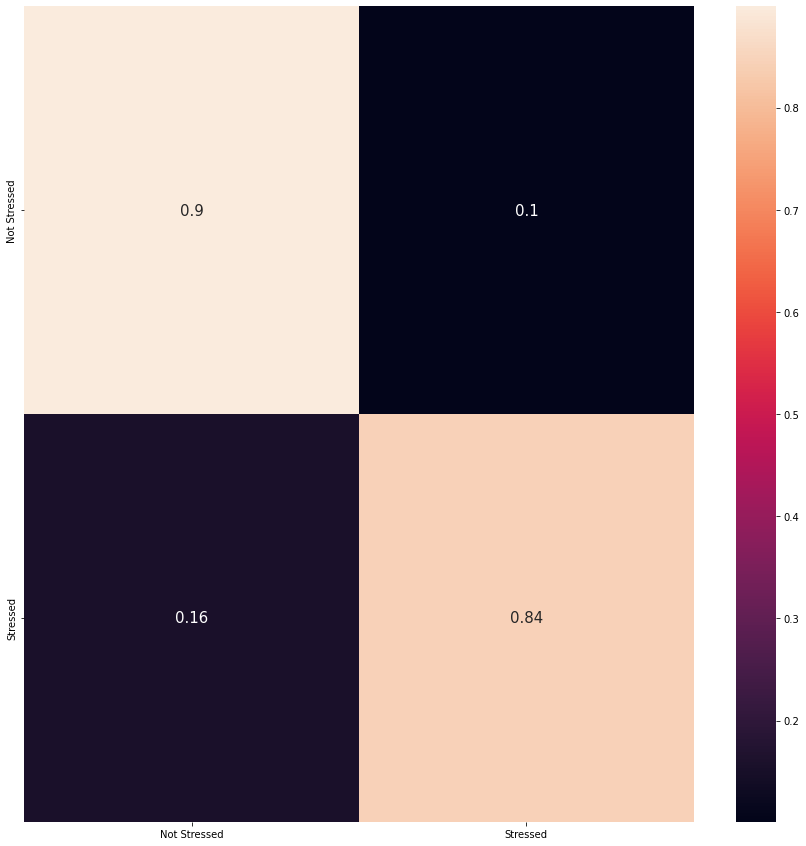

In [89]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Stressed','Stressed'],columns = ['Not Stressed','Stressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [91]:
test = np.array(['I feel depressed, sadness and anxiety - just want to sleep until the lockdown ends'])
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence = pad_sequences(test_sequence, maxlen=max_len)
test_prediction = model3.predict(test_sequence)
if np.around(test_prediction, decimals=0)[0][0] == 1.0:
    print('The model predicted stressed language')
else:
    print("The model predicted other type of language")

The model predicted stressed language


In [92]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Untitled folder')[:5]

['0314_1.csv', '0314_2.csv', '0314_3.csv', '0314_4.csv', '0314_5.csv']

In [93]:
tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Untitled folder/0314_1.csv')
tweets.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-14 23:55:21,AlbertoxVazquez,NaN,0,1,5,Bout to depression buy these OnlyFans while I’...,NaN,NaN,NaN,1238977045230739460,https://twitter.com/AlbertoxVazquez/status/123...
1,2020-03-14 23:54:45,TheOGKennedy,NaN,6,2,63,Pretty lucky for me how we ended up in the onl...,NaN,NaN,NaN,1238976896160772096,https://twitter.com/TheOGKennedy/status/123897...
2,2020-03-14 23:45:58,megmarie5,NaN,0,0,0,@ariana2525 I myself suffered & still suffer. ...,NaN,@ariana2525,NaN,1238974685015990273,https://twitter.com/megmarie5/status/123897468...
3,2020-03-14 23:43:10,BoozyBillsBabe,NaN,13,0,39,Second full day of self-quarantine and I am ju...,NaN,NaN,NaN,1238973978963836928,https://twitter.com/BoozyBillsBabe/status/1238...
4,2020-03-14 23:42:39,megmarie5,NaN,0,0,1,I’m behind on @VanderpumpRules and binge watch...,NaN,@VanderpumpRules @ariana2525,NaN,1238973850227884032,https://twitter.com/megmarie5/status/123897385...


In [94]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Untitled folder'):
    for filename in filenames:
        if filename!='0314_1.csv':
            temp = pd.read_csv(os.path.join(dirname, filename))
            tweets = pd.concat([tweets, temp], ignore_index=True)

In [95]:
tweets.shape

(25425, 12)

In [96]:
tweets.sort_values(by=['date'],inplace=True)
tweets.reset_index(drop=True,inplace=True)
tweets = tweets[['date','text']]

In [97]:
tweets_dataset = tweets.copy()
tweets.head()

,date,text
0,2020-03-14 00:04:13,Damn just remembered this front bottoms show i...
1,2020-03-14 00:07:19,"hapless Dementia joe will lose to Trump, even ..."
2,2020-03-14 00:07:52,it's making me anxious lol
3,2020-03-14 00:08:46,I’m so glad my depression kicked in I’m going ...
4,2020-03-14 00:11:16,Have some wine . You’ll feel less anxious.


In [98]:
#Removing non-ascii characters (for example, arabian chars)
tweets.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#Making all fields string type
for i in range(len(tweets)):
  tweets.at[i,'text'] = str(tweets.iloc[i]['text'])
#Removing URLs
for i in range(len(tweets)):
  tweets.at[i,'text'] = remove_urls(tweets.iloc[i]['text'])
# Convert to list
data = tweets.text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [99]:
data = np.array(data)
data[:10]

array(['Damn just remembered this front bottoms show is about to cure my depression',
       'hapless Dementia joe will lose to Trump, even if the economy craters into a full on depression & covid19 kills millions of people. Second you cannot expect to conduct an unfair, corrupt & illegitimate primary & expect people to fall in line. I voted for Hillary last time no mas.',
       'its making me anxious lol',
       'Im so glad my depression kicked in Im going to BED',
       'Have some wine . Youll feel less anxious.',
       'Everyone be patient. Messages blowing up. I know yall are anxious to bet something. I am doing mini write ups on each of the 6 games, because I want to be clear Im not just picking games for fucks sake. Theres a method to my madness. Once you pay, hang tight! Thank you!',
       'Cant wait to tell my kids about the toilet paper depression of 2020',
       'I think in order to keep sick hourly workers home, and to support people who cant work from home but have ki

In [100]:
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   28    3   10]
 [   0    0    0 ...  227   68  105]
 [   0    0    0 ...  625   31  153]
 ...
 [   0    0    0 ...    0  493  493]
 [   0    0    0 ... 1084 1394 2402]
 [   0    0    0 ... 1084 1394 2402]]


In [101]:
predictions = model3.predict(tweets)

In [102]:
np.around(predictions, decimals=0)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [103]:
tweets_dataset['label'] = np.around(predictions, decimals=0)

In [106]:
tweets_dataset[tweets_dataset['label']==1.0].head(10)

,date,text,label
3,2020-03-14 00:08:46,I’m so glad my depression kicked in I’m going ...,1.0
5,2020-03-14 00:12:38,Everyone be patient. Messages blowing up. I kn...,1.0
7,2020-03-14 00:14:34,I think in order to keep sick hourly workers h...,1.0
9,2020-03-14 00:15:00,"Right on, dedication is proven to our city. ""W...",1.0
14,2020-03-14 00:24:20,Take me back! Kind of been in a slight depress...,1.0
16,2020-03-14 00:27:29,Take me back! Kind of been in a slight depress...,1.0
19,2020-03-14 00:29:06,Take me back! Kind of been in a slight depress...,1.0
21,2020-03-14 00:33:07,Take me back! Kind of been in a slight depress...,1.0
22,2020-03-14 00:33:07,this is gonna make me sound insufferable but m...,1.0
25,2020-03-14 00:45:41,Glass half full. Glass half empty. Glass crack...,1.0


In [105]:
for i in range(10):
    print(tweets_dataset.iloc[i*2]['text'])
    print('\n')

Damn just remembered this front bottoms show is about to cure my depression


it's making me anxious lol


Have some wine . You’ll feel less anxious.


Can’t wait to tell my kids about the toilet paper depression of 2020


<——— anxious bunny https://twitter.com/GlennonDoyle/status/1238449159168053250 …


And here we are the Great Depression of toilet paper


Depression is knocking at the door #Tougaloo_RYS20 #Jackson_RYS20https://twitter.com/UnderRatedTim/status/1238589018662715392 …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.com/p/B9sZ6Q9HmL-/?igshid=kku0lw1dwunw …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.co